    importing the data from fivethirthy eight.
    Please refer to the data dictionary here - https://github.com/fivethirtyeight/data/tree/master/fandango
    


In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [5]:
reviews = pd.read_csv('/Users/Suha/Projects/TestGitHub/Fadango/fandango_score_comparison.csv')
reviews.head()
reviews.columns


Index(['FILM', 'RottenTomatoes', 'RottenTomatoes_User', 'Metacritic',
       'Metacritic_User', 'IMDB', 'Fandango_Stars', 'Fandango_Ratingvalue',
       'RT_norm', 'RT_user_norm', 'Metacritic_norm', 'Metacritic_user_nom',
       'IMDB_norm', 'RT_norm_round', 'RT_user_norm_round',
       'Metacritic_norm_round', 'Metacritic_user_norm_round',
       'IMDB_norm_round', 'Metacritic_user_vote_count', 'IMDB_user_vote_count',
       'Fandango_votes', 'Fandango_Difference'],
      dtype='object')

pulling the normalised rating value in a seperate dataframe as all these sites use different kind of scales for rating
the normalised scale is from 0 to 5

In [13]:
norm_reviews = reviews[['FILM', 'RT_user_norm', 'Metacritic_user_nom', 'IMDB_norm', 'Fandango_Ratingvalue', 
                        'Fandango_Stars']]
norm_reviews.head()

,FILM,RT_user_norm,Metacritic_user_nom,IMDB_norm,Fandango_Ratingvalue,Fandango_Stars
0,Avengers: Age of Ultron (2015),4.3,3.55,3.90,4.5,5.0
1,Cinderella (2015),4.0,3.75,3.55,4.5,5.0
2,Ant-Man (2015),4.5,4.05,3.90,4.5,5.0
3,Do You Believe? (2015),4.2,2.35,2.70,4.5,5.0
4,Hot Tub Time Machine 2 (2015),1.4,1.70,2.55,3.0,3.5


We will look at the user rating for this excercise. Just looking at the first row indicates that fadango rating is more than the rating offered by the other sites. We will look at the bar chart for the movie Avengers: Age of Ultron (2015)	


In [42]:

categories = ['RT_user_norm', 'Metacritic_user_nom', 'IMDB_norm', 'Fandango_Ratingvalue', 'Fandango_Stars']
# we want to position of the leftmost side of the 5 bars are [.75, 1.75, 2.75,3.75, 4.75]
left_position = np.arange(5)+.95
print(left_position)

[ 0.95  1.95  2.95  3.95  4.95]


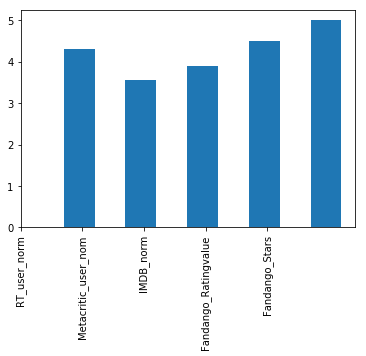

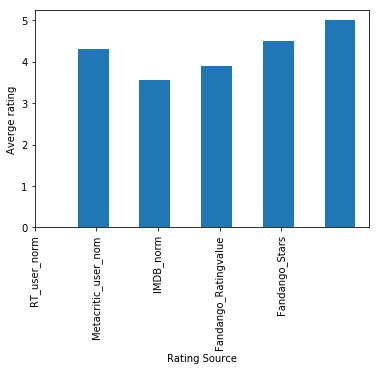

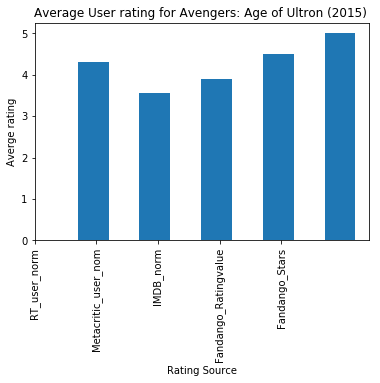

In [48]:
#heights of the bar is the average normalised rating for the first movie
bar_height = norm_reviews[categories].iloc[0].values
bar_height

# allocating the fig and the axis to the subplot
fig, ax = plt.subplots()
ax.bar(left_position, bar_height, .5)
tick_position = np.arange(5)
ax.set_xticks(tick_position)
ax.set_xticklabels(categories, rotation = 90)
ax.set_xlabel("Rating Source")
ax.set_ylabel("Averge rating")
ax.set_title("Average User rating for Avengers: Age of Ultron (2015) ")
plt.show()

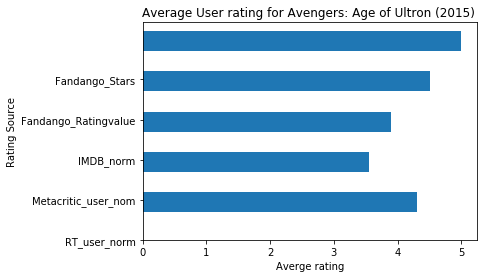

In [61]:
# plotting the graph on the y axis
fig, ax = plt.subplots()
ax.barh(left_position,bar_height, .5)
ax.set_yticks(tick_position)
ax.set_ylabel("Rating Source")
ax.set_xlabel("Averge rating")
ax.set_title("Average User rating for Avengers: Age of Ultron (2015) ")
ax.set_yticklabels(categories)
plt.show()

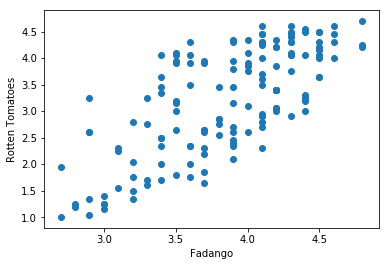

In [75]:
 # let us generate a scatter plot to find the if the fadango rating and RT_user_norm is strongly or loosely correlated.
    
fig , ax = plt.subplots()
plt.scatter(norm_reviews['Fandango_Ratingvalue'], norm_reviews['RT_user_norm'])
plt.xlabel('Fadango')
plt.ylabel('Rotten Tomatoes')
plt.show()


This shows that there is a weak positive correlation between the rotten tomato rating and the fadango ratings. there are multiple rotten tomatoes rating corresponding to one fadango rating. 
Generally in a scatter plot, the x axis is occupied by the independent variable and y by the dependent variable.
Here we are seeking to understand the correlation. Let us flop the axis and see how the plot is affected


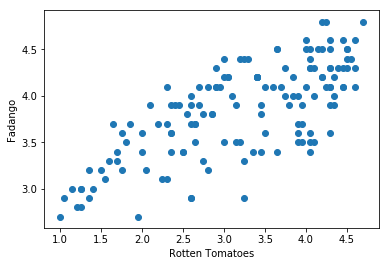

In [76]:
fig , ax = plt.subplots()
plt.scatter( norm_reviews['RT_user_norm'], norm_reviews['Fandango_Ratingvalue'])
plt.ylabel('Fadango')
plt.xlabel('Rotten Tomatoes')
plt.show()

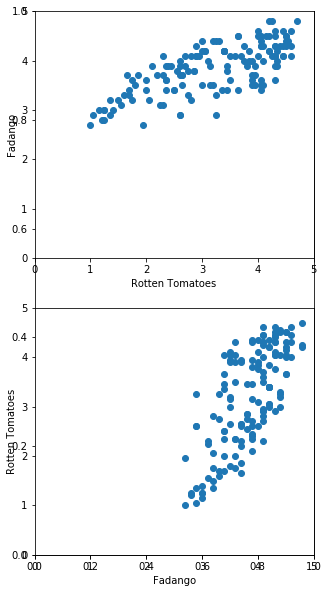

In [109]:
# let us use the same sumplots to generate both scatter plot
fig, ax= plt.subplots(figsize = (5,10))

ax1 = fig.add_subplot(2,1,1)
ax1.scatter( norm_reviews['RT_user_norm'], norm_reviews['Fandango_Ratingvalue'])
ax1.set_xlim(0,5)
ax1.set_ylim(0,5)
ax1.set_ylabel('Fadango')
ax1.set_xlabel('Rotten Tomatoes')


ax2 = fig.add_subplot(2,1,2)
ax2.scatter(norm_reviews['Fandango_Ratingvalue'], norm_reviews['RT_user_norm'])
ax2.set_xlim(0,5)
ax2.set_ylim(0,5)
ax2.set_xlabel('Fadango')
ax2.set_ylabel('Rotten Tomatoes')
plt.show()

The scatter plot is mirror image of each other, the correlation remains the same. Lets us generate a sctter plot to see how fadango ratings compare with rest of the 3 review sites. Comparing fadango with rotten tomatoes, metacritic and and IMDb

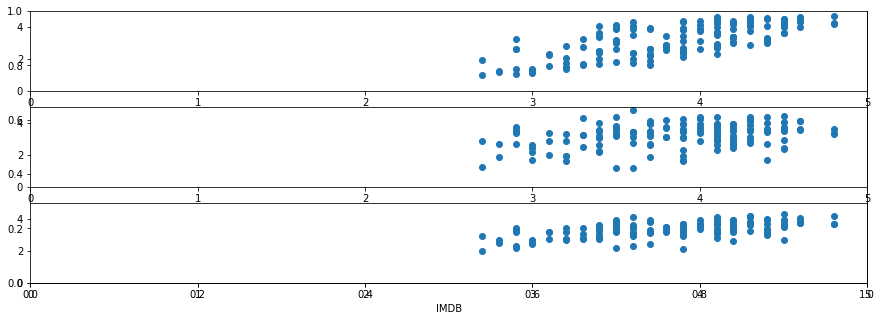

In [119]:
fig, ax = plt.subplots(figsize = (15,5))
ax1 = fig.add_subplot(3,1,1,)
ax2 = fig.add_subplot(3,1,2)
ax3 = fig.add_subplot(3,1,3)

ax1.scatter(norm_reviews['Fandango_Ratingvalue'], norm_reviews['RT_user_norm'])
ax1.set_xlabel("Fadango")
ax1.set_xlabel("Rotten Tomatoes")
ax1.set_xlim(0,5)
ax1.set_ylim(0,5)

ax2.scatter(norm_reviews['Fandango_Ratingvalue'], norm_reviews['Metacritic_user_nom'])
ax2.set_xlabel("Fadango")
ax2.set_xlabel("Metacritic")
ax2.set_xlim(0,5)
ax2.set_ylim(0,5)

ax3.scatter(norm_reviews['Fandango_Ratingvalue'], norm_reviews['IMDB_norm'])
ax3.set_xlabel("Fadango")
ax3.set_xlabel("IMDB")
ax3.set_xlim(0,5)
ax3.set_ylim(0,5)
plt.show()

looks like imdb and fadango are more stongly correlated than fadango and rest of the rating. Also both IMDB and Fadango span a smaller range of ratings